[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/066_gol/gol.ipynb)

# El Juego de la Vida en 5 niveles

intro


## Noob

Estás aprendiendo a programar

In [1]:
import random 

def init(Nx, Ny):
    C = [[0 for j in range(Nx)] for i in range(Ny)]
    for i in range(Ny):
        for j in range(Nx):
            C[i][j] = random.randint(0,1)
    return C
    
C0 = init(5, 5)
C0

[[1, 1, 1, 1, 1],
 [1, 0, 0, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 0, 1, 0, 1],
 [1, 1, 0, 0, 1]]

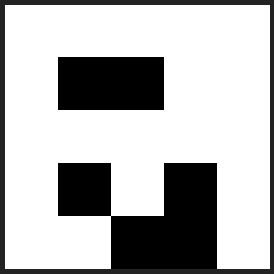

In [2]:
import matplotlib.pyplot as plt

def plot(C, ax=None):
    if ax is None:
        fig, ax = plt.subplots(dpi=50)
    ax.imshow(C, cmap="gray")
    ax.axis('off')
    
plot(C0)

In [3]:
def iter(C):
    Ny, Nx = len(C), len(C[0])
    C2 = [[0 for j in range(Nx)] for i in range(Ny)]
    for i in range(Ny):
        for j in range(Nx):
            c = C[i][j]
            # numero vecinos
            v = C[i][j+1] + C[i][j-1] + C[i-1][j] + C[i+1][j] + \
                C[i+1][j+1] + C[i+1][j-1] + C[i-1][j+1] + C[i-1][j-1]
    return C2

In [4]:
def gol(C0, MAX_IT = 10):
    count = 0
    Cs = [C0]
    while count < MAX_IT:
        C = iter(C0)
        Cs.append(C)
        C0 = C
        count += 1
    return Cs

In [5]:
C0 = init(20, 20)
Cs = gol(C0)

IndexError: list index out of range

In [6]:
def iter(C):
    Ny, Nx = len(C), len(C[0])
    C2 = [[0 for j in range(Nx)] for i in range(Ny)]
    for i in range(Ny):
        for j in range(Nx):
            c = C[i][j]
            # numero vecinos
            v = 0
            if j > 0:
                v += C[i][j-1]
            if j < Nx - 1:
                v += C[i][j+1]
            if i > 0:
                v += C[i-1][j]
                if j > 0:
                    v += C[i-1][j-1]
                if j < Nx - 1:
                    v += C[i-1][j+1]
            if i < Ny - 1:
                v += C[i+1][j]
                if j > 0:
                    v += C[i+1][j-1]
                if j < Nx - 1:
                    v += C[i+1][j+1]
            # nuevo estado
            if c == 0:
                if v == 3:
                    C2[i][j] = 1
                else: 
                    C2[i][j] = 0
            else: 
                if v == 2 or v == 3:
                    C2[i][j] = 1
                else: 
                    C2[i][j] = 0
    return C2

In [7]:
C0 = init(20, 20)
Cs = gol(C0)

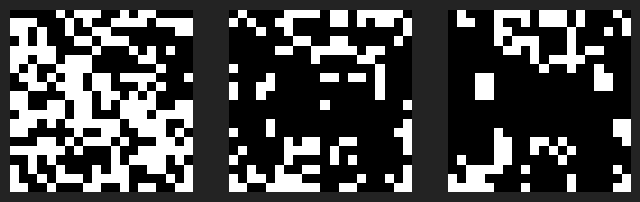

In [8]:
fig = plt.figure(dpi=100)
ax = plt.subplot(1, 3, 1)
plot(Cs[0], ax)
ax = plt.subplot(1, 3, 2)
plot(Cs[1], ax)
ax = plt.subplot(1, 3, 3)
plot(Cs[2], ax)
plt.show()

In [9]:
# animación

from matplotlib import animation, rc
rc('animation', html='html5')

def update(i):
    ax.clear()
    ax.imshow(Cs[i], cmap="gray")
    ax.axis('off')
    return ax
 
C0 = init(100, 100)
%time Cs = gol(C0, MAX_IT=100)

fig = plt.figure(dpi=50)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=100)
plt.close()

anim

CPU times: user 684 ms, sys: 0 ns, total: 684 ms
Wall time: 682 ms


## Principante

Sabes que puedes hacerlo mejor


In [10]:
def init(Nx, Ny):
    C = [[0 for j in range(Nx+2)] for i in range(Ny+2)]
    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            C[i][j] = random.randint(0,1)
    return C
    
init(3, 3)

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0]]

In [11]:
def iter(C):
    Ny, Nx = len(C) - 2, len(C[0]) - 2
    C2 = [[0 for j in range(Nx+2)] for i in range(Ny+2)]
    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            c = C[i][j]
            # vecinos
            v = C[i][j+1] + C[i][j-1] + C[i-1][j] + C[i+1][j] + \
                C[i+1][j+1] + C[i+1][j-1] + C[i-1][j+1] + C[i-1][j-1]
            # nuevo estado
            if c == 0:
                if v == 3:
                    C2[i][j] = 1
                else: 
                    C2[i][j] = 0
            else: 
                if v == 2 or v == 3:
                    C2[i][j] = 1
                else: 
                    C2[i][j] = 0
    return C2

In [12]:
C0 = init(100, 100)
%time Cs = gol(C0, MAX_IT=100)

fig = plt.figure(dpi=50)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=100)
plt.close()

anim

CPU times: user 519 ms, sys: 0 ns, total: 519 ms
Wall time: 519 ms


## Intermedio

En busca de la performance

matrices

In [99]:
import numpy as np

def init(Nx, Ny):
    C = np.random.randint(0, 2, (Ny*Nx,))
    #C = np.ones((Ny*Nx,))
    return C

Ny, Nx = 3, 3
init(Ny, Nx)

array([0, 1, 0, 0, 0, 0, 1, 0, 1])

In [100]:
init(Ny, Nx).reshape(Ny, Nx)

array([[0, 0, 0],
       [0, 1, 1],
       [1, 1, 0]])

In [101]:
from scipy.sparse import csr_matrix

def vecinos(Nx, Ny):
    V = np.zeros((Ny*Nx, Ny*Nx))
    for i in range(Ny*Nx):
        for j in range(Ny*Nx):
            if i == j:
                if j > 0 and j % Nx:
                    V[i][j-1] = 1
                if j < Ny*Nx - 1 and (j+1) % Nx:
                    V[i][j+1] = 1
                if j >= Nx:
                    V[i][j-Nx] = 1
                    if (j+1) % Nx:
                        V[i][j-Nx+1] = 1
                    if j % Nx:
                        V[i][j-Nx-1] = 1
                if j <= (Ny-1)*Nx - 1:
                    V[i][j+Nx] = 1
                    if j % Nx:
                        V[i][j+Nx-1] = 1
                    if (j+1) % Nx:
                        V[i][j+Nx+1] = 1
    return V

Nx, Ny = 3, 3
vecinos(Nx, Ny)

array([[0., 1., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0., 1., 0.]])

In [102]:
C = init(Nx, Ny)
V = vecinos(Nx, Ny)

N = V.dot(C)
N.reshape(Ny, Nx)

array([[1., 2., 1.],
       [4., 6., 4.],
       [1., 2., 1.]])

In [103]:
C.reshape(Ny, Nx)

array([[1, 1, 1],
       [0, 0, 0],
       [1, 1, 1]])

In [104]:
def iter(C, V):
    C2 = np.zeros(C.shape)
    N = V.dot(C)
    C2[(C == 0) & (N == 3)] = 1
    C2[(C == 1) & ((N == 2) | (N == 3))] = 1
    return C2

In [105]:
def gol(C0, V, MAX_IT = 10):
    count = 0
    Cs = [C0]
    while count < MAX_IT:
        C = iter(C0, V)
        Cs.append(C)
        C0 = C
        count += 1
    return Cs

In [106]:
def update(i):
    ax.clear()
    ax.imshow(Cs[i].reshape((Ny,Nx)), cmap="gray")
    ax.axis('off')
    return ax

In [108]:
Nx, Ny = 100, 100
C0 = init(Nx, Ny)
V = vecinos(Nx, Ny)
%time Cs = gol(C0, V, MAX_IT=100)

CPU times: user 1.3 s, sys: 271 ms, total: 1.57 s
Wall time: 158 ms


In [109]:
fig = plt.figure(dpi=50)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=100)
plt.close()

anim

## Avanzado

No es suficiente

programación en paralelo

In [22]:
import multiprocessing

num_cores = multiprocessing.cpu_count()
num_cores

20

In [23]:
from concurrent.futures import ProcessPoolExecutor

def f(i):
    #print(f"hola soy {i} \n")
    return i*2
    
p = list(range(num_cores))

with ProcessPoolExecutor(max_workers=num_cores) as pool:
    results = list(pool.map(f, p))
    
results

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

In [54]:
def itera(args):
    C, V, world_size, i = args
    block_size = len(C) // world_size
    C2 = np.zeros(block_size)
    N = V[i*block_size:(i+1)*block_size,:].dot(C)
    C = C[i*block_size:(i+1)*block_size]
    C2[(C == 0) & (N == 3)] = 1
    C2[(C == 1) & ((N == 2) | (N == 3))] = 1
    return C2

In [62]:
def gol_mp(p, C0, V, MAX_IT):
    with ProcessPoolExecutor(max_workers=len(p)) as pool:
        count = 0
        Cs = [C0]
        while count < MAX_IT:
            args = ((C0, V, len(p), i) for i in p)
            results = list(pool.map(itera, args))
            C = np.stack(results).ravel()
            Cs.append(C)
            C0 = C
            count += 1
    return Cs

In [74]:
p = [0, 1, 2, 3]#list(range(num_cores))
MAX_IT = 100
Nx, Ny = 40, 40

C0 = init(Nx, Ny)
V = vecinos(Nx, Ny)

%time Cs = gol_mp(p, C0, V, MAX_IT)

CPU times: user 2.69 s, sys: 6.23 s, total: 8.92 s
Wall time: 23.2 s


In [75]:
fig = plt.figure(dpi=50)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=100)
plt.close()

anim

In [76]:
import torch

Vt = torch.from_numpy(V)
Vt.shape

torch.Size([1600, 1600])

In [119]:
def gol_torch(C0, V, MAX_IT, device="cpu"):
    with torch.no_grad():
        Cs = [C0]
        C0 = C0.to(device)
        V = V.to(device)
        count = 0
        while count < MAX_IT:
            N = V @ C0
            C2 = torch.zeros(Ny*Nx).to(device)
            C2[(C0 == 0) & (N == 3)] = 1
            C2[(C0 == 1) & ((N == 2) | (N == 3))] = 1
            C0 = C2
            Cs.append(C2.cpu())
            count += 1
        return Cs

In [139]:
Nx, Ny = 100, 100
C0 = torch.from_numpy(init(Nx, Ny)).float()
V =  torch.from_numpy(vecinos(Nx, Ny)).float()
MAX_IT = 100
%time Cs = gol_torch(C0, V, MAX_IT)

CPU times: user 5.63 s, sys: 0 ns, total: 5.63 s
Wall time: 563 ms


In [140]:
%time Cs = gol_torch(C0, V, MAX_IT, 'cuda')

CPU times: user 1.17 s, sys: 11.4 ms, total: 1.18 s
Wall time: 118 ms


In [141]:
fig = plt.figure(dpi=50)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(Cs), interval=100)
plt.close()

anim

## Pro

Al límite

gpu

## Bonus: Nivel Dios

sparse

In [ ]:
from scipy.sparse import csr_matrix

def vecinos(Nx, Ny):
    #V = np.zeros((Ny*Nx, Ny*Nx))
    data, indices, indptr = [], [], [0]
    for j in range(Ny*Nx):
        for i in range(Ny*Nx):
            if i == j:
                if i > 0 and i % Nx:
                    #V[i-1][j] = 1
                    data.append(1)
                    indices.append(i-1)
                if i < Ny*Nx - 1 and (i+1) % Nx:
                    #V[i+1][j] = 1
                    data.append(1)
                    indices.append(i+1)
                if i >= Nx:
                    #V[i-Nx][j] = 1
                    data.append(1)
                    indices.append(i-Nx)
                    if (i+1) % Nx:
                        #V[i-Nx+1][j] = 1
                        data.append(1)
                        indices.append(i-Nx+1)
                    if i % Nx:
                        #V[i-Nx-1][j] = 1
                        data.append(1)
                        indices.append(i-Nx-1)
                if i <= (Ny-1)*Nx - 1:
                    #V[i+Nx][j] = 1
                    data.append(1)
                    indices.append(i+Nx)
                    if i % Nx:
                        #V[i+Nx-1][j] = 1
                        data.append(1)
                        indices.append(i+Nx-1)
                    if (i+1) % Nx:
                        #V[i+Nx+1][j] = 1
                        data.append(1)
                        indices.append(i+Nx+1)
        indptr.append(len(indices))
    #return V
    return csr_matrix((data, indices, indptr))

Nx, Ny = 3, 3
vecinos(Nx, Ny).toarray()


## Resumen

Esto sirve para redes neuronales, simulación de fluidos, etc.